In [1]:
%matplotlib inline

# 实验六  聚类分析
+ 使用kmeans，dbscan，层次聚类，AP聚类算法，分别设置不同的参数，分别对两组数据进行聚类，比较结果的差别；
+ 分析聚类获得的结果，请使用adjusted_rand_score这个测度来比较不同聚类算法在两个数据集上性能的差异。

## IRIS数据集进行聚类
### IRIS数据集的分析

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

进行数据挖掘前，必须对数据有深入的认识。首先读入数据

In [3]:
headers = ['SL', 'SW', 'PL', 'PW', 'type']
attrs = headers[:-1]
df = pd.read_csv('data/iris/iris.data.txt', names=headers)
df.head()

,SL,SW,PL,PW,type
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


首先要进行基本的分割

In [4]:
df_by_type = {}
for ty in df.type.unique():
    df_by_type[ty] = df[df.type==ty][attrs]
df_by_type.keys()

dict_keys(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

计算每一个方差、均值

In [5]:
for t,d in df_by_type.items():
    print(t)
    print(pd.DataFrame(data={'mean':d.mean(), 'std':d.std()}))

Iris-setosa
     mean       std
SL  5.006  0.352490
SW  3.418  0.381024
PL  1.464  0.173511
PW  0.244  0.107210
Iris-versicolor
     mean       std
SL  5.936  0.516171
SW  2.770  0.313798
PL  4.260  0.469911
PW  1.326  0.197753
Iris-virginica
     mean       std
SL  6.588  0.635880
SW  2.974  0.322497
PL  5.552  0.551895
PW  2.026  0.274650


### 数据预处理
标准化数据集，并保留标准化前的备用

In [6]:
orig_df = df[attrs]
stan_df = (orig_df - orig_df.mean()) / orig_df.std()
labels = df.type

In [7]:
stan_df

,SL,SW,PL,PW
0,-0.897674,1.028611,-1.336794,-1.308593
1,-1.139200,-0.124540,-1.336794,-1.308593
2,-1.380727,0.336720,-1.393470,-1.308593
3,-1.501490,0.106090,-1.280118,-1.308593
4,-1.018437,1.259242,-1.336794,-1.308593
...,...,...,...,...
145,1.034539,-0.124540,0.816888,1.443121
146,0.551486,-1.277692,0.703536,0.918985
147,0.793012,-0.124540,0.816888,1.050019
148,0.430722,0.797981,0.930239,1.443121


### 聚类

In [8]:
from sklearn.cluster import KMeans, DBSCAN, Birch, AffinityPropagation
from sklearn.metrics import adjusted_rand_score
sns.set_style('darkgrid')

In [9]:
def plotit(title, scores, xs, name, xlabel="K-value", ylabel="adjusted rand score"):
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    df = pd.DataFrame({name: scores}, index=xs)
    sns.lineplot(data = df)
    return df

In [10]:
def merge(dfs, title, xlabel="K-value", ylabel="adjusted rand score"):
    df = pd.concat(dfs, axis=1)
    plt.figure(figsize=(10,5))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    sns.lineplot(data = df)

In [11]:
orig_results = []
stan_results = []

K-Means

In [12]:
def k_means_clustering(data, labels, title="", start=2, end=10):
    scores = []
    ks = []
    for i in range(start, end+1):
        ks.append(i)
        pre = KMeans(n_clusters=i).fit_predict(data)
        score = adjusted_rand_score(labels, pre)
        print("adjusted rand score is {:.4f} while k = {}".format(score, i))
        scores.append(score)    
    df = plotit(title, scores, ks, "KMeans " + title)
    return df

adjusted rand score is 0.5399 while k = 2
adjusted rand score is 0.7302 while k = 3
adjusted rand score is 0.6498 while k = 4
adjusted rand score is 0.6155 while k = 5
adjusted rand score is 0.4462 while k = 6
adjusted rand score is 0.4196 while k = 7
adjusted rand score is 0.4507 while k = 8
adjusted rand score is 0.4061 while k = 9
adjusted rand score is 0.4034 while k = 10


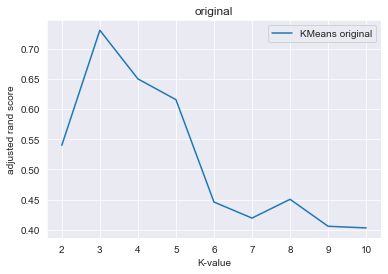

In [13]:
df1 = k_means_clustering(orig_df, labels, end = 10, title = "original")

adjusted rand score is 0.5681 while k = 2
adjusted rand score is 0.6201 while k = 3
adjusted rand score is 0.4777 while k = 4
adjusted rand score is 0.4183 while k = 5
adjusted rand score is 0.3810 while k = 6
adjusted rand score is 0.4166 while k = 7
adjusted rand score is 0.3148 while k = 8
adjusted rand score is 0.3192 while k = 9
adjusted rand score is 0.3650 while k = 10


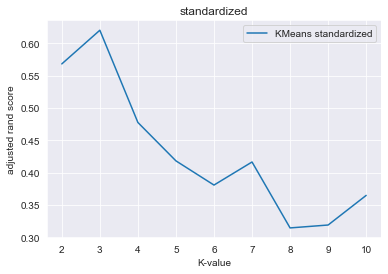

In [14]:
df2 = k_means_clustering(stan_df, labels, end = 10, title = "standardized")

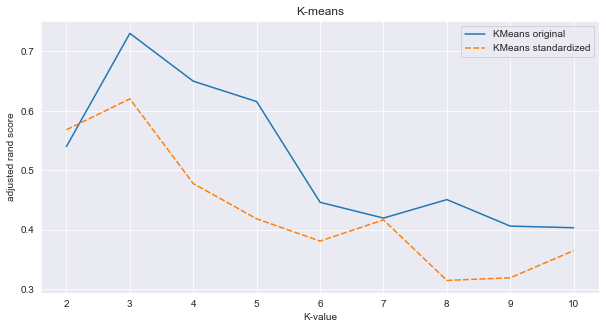

In [15]:
merge([df1, df2], "K-means")

DBScan

In [16]:
def dbscan_clustering(data, labels, title="", start=2, end=10):
    scores = []
    mss = []
    for i in range(start, end+1):
        mss.append(i)
        pre = DBSCAN(min_samples=i).fit_predict(data)
        d = pd.DataFrame(pre, columns=['cls'])
        n_cls = len(d.cls.unique())
        score = adjusted_rand_score(labels, pre)
        print("ARS is {:.4f} , {} clusters, while min_samples = {}".format(score,n_cls, i))
        scores.append(score)    
    df = plotit(title, scores, mss, "DBSCAN " + title)
    return df

ARS is 0.5233 , 7 clusters, while min_samples = 2
ARS is 0.5226 , 5 clusters, while min_samples = 3
ARS is 0.5258 , 4 clusters, while min_samples = 4
ARS is 0.5206 , 3 clusters, while min_samples = 5
ARS is 0.5224 , 3 clusters, while min_samples = 6
ARS is 0.5100 , 3 clusters, while min_samples = 7
ARS is 0.5144 , 3 clusters, while min_samples = 8
ARS is 0.5206 , 3 clusters, while min_samples = 9
ARS is 0.5288 , 3 clusters, while min_samples = 10
ARS is 0.6348 , 4 clusters, while min_samples = 11
ARS is 0.5672 , 4 clusters, while min_samples = 12
ARS is 0.5761 , 4 clusters, while min_samples = 13
ARS is 0.6194 , 3 clusters, while min_samples = 14
ARS is 0.4959 , 3 clusters, while min_samples = 15
ARS is 0.4863 , 3 clusters, while min_samples = 16
ARS is 0.4739 , 2 clusters, while min_samples = 17
ARS is 0.4739 , 2 clusters, while min_samples = 18
ARS is 0.4739 , 2 clusters, while min_samples = 19
ARS is 0.4739 , 2 clusters, while min_samples = 20


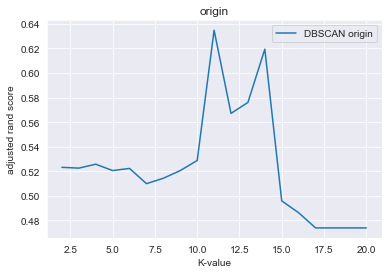

In [17]:
df1 = dbscan_clustering(orig_df, labels, title="origin", end=20)

ARS is 0.4430 , 10 clusters, while min_samples = 2
ARS is 0.4413 , 8 clusters, while min_samples = 3
ARS is 0.4338 , 3 clusters, while min_samples = 4
ARS is 0.4283 , 3 clusters, while min_samples = 5
ARS is 0.4206 , 5 clusters, while min_samples = 6
ARS is 0.4523 , 6 clusters, while min_samples = 7
ARS is 0.4267 , 4 clusters, while min_samples = 8
ARS is 0.3626 , 5 clusters, while min_samples = 9
ARS is 0.2792 , 4 clusters, while min_samples = 10
ARS is 0.2934 , 3 clusters, while min_samples = 11
ARS is 0.2609 , 2 clusters, while min_samples = 12
ARS is 0.2609 , 2 clusters, while min_samples = 13
ARS is 0.2145 , 2 clusters, while min_samples = 14
ARS is 0.1045 , 2 clusters, while min_samples = 15
ARS is 0.0543 , 2 clusters, while min_samples = 16
ARS is 0.0543 , 2 clusters, while min_samples = 17
ARS is 0.0000 , 1 clusters, while min_samples = 18
ARS is 0.0000 , 1 clusters, while min_samples = 19
ARS is 0.0000 , 1 clusters, while min_samples = 20


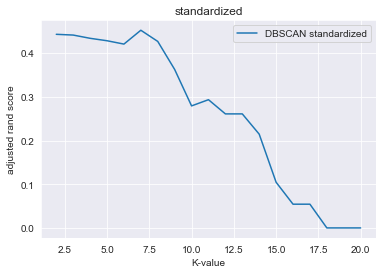

In [18]:
df2 = dbscan_clustering(stan_df, labels, title="standardized", end=20)

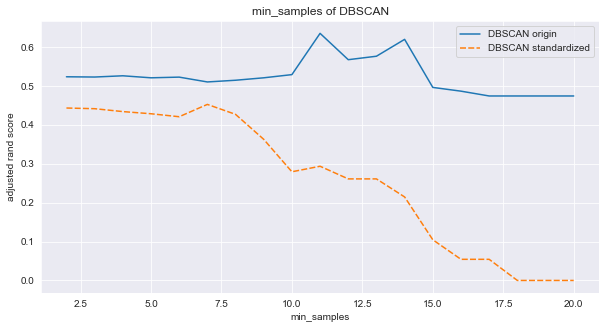

In [19]:
merge([df1, df2], "min_samples of DBSCAN", xlabel="min_samples")

In [20]:
def dbscan_clustering_eps(data, labels, min_samples, title="", start=1, end=13):
    scores = []
    mss = []
    for i in [t/10 for t in range(start, end+1)]:
        mss.append(i)
        pre = DBSCAN(min_samples=min_samples, eps=i).fit_predict(data)
        d = pd.DataFrame(pre, columns=['cls'])
        n_cls = len(d.cls.unique())
        score = adjusted_rand_score(labels, pre)
        print("ARS is {:.4f} , {} clusters, while eps = {}".format(score,n_cls, i))
        scores.append(score)    
    df = plotit(title, scores, mss, "DBSCAN " + title)
    return df

ARS is 0.0000 , 1 clusters, while eps = 0.1
ARS is 0.0000 , 1 clusters, while eps = 0.2
ARS is 0.0996 , 3 clusters, while eps = 0.3
ARS is 0.4322 , 3 clusters, while eps = 0.4
ARS is 0.6348 , 4 clusters, while eps = 0.5
ARS is 0.5180 , 3 clusters, while eps = 0.6
ARS is 0.5514 , 3 clusters, while eps = 0.7
ARS is 0.5601 , 3 clusters, while eps = 0.8
ARS is 0.5621 , 3 clusters, while eps = 0.9
ARS is 0.5681 , 2 clusters, while eps = 1.0
ARS is 0.5681 , 2 clusters, while eps = 1.1
ARS is 0.5681 , 2 clusters, while eps = 1.2
ARS is 0.5681 , 2 clusters, while eps = 1.3
ARS is 0.5681 , 2 clusters, while eps = 1.4
ARS is 0.5681 , 2 clusters, while eps = 1.5
ARS is 0.5681 , 2 clusters, while eps = 1.6
ARS is 0.0000 , 1 clusters, while eps = 1.7
ARS is 0.0000 , 1 clusters, while eps = 1.8
ARS is 0.0000 , 1 clusters, while eps = 1.9
ARS is 0.0000 , 1 clusters, while eps = 2.0


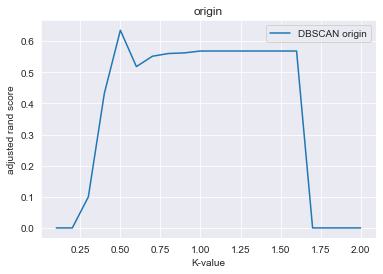

In [21]:
df1 = dbscan_clustering_eps(orig_df, labels, 11, title="origin", end=20)

ARS is 0.0000 , 1 clusters, while eps = 0.1
ARS is 0.0000 , 1 clusters, while eps = 0.2
ARS is 0.0707 , 3 clusters, while eps = 0.3
ARS is 0.1657 , 4 clusters, while eps = 0.4
ARS is 0.4523 , 6 clusters, while eps = 0.5
ARS is 0.4609 , 3 clusters, while eps = 0.6
ARS is 0.5008 , 3 clusters, while eps = 0.7
ARS is 0.5360 , 3 clusters, while eps = 0.8
ARS is 0.5401 , 3 clusters, while eps = 0.9
ARS is 0.5536 , 3 clusters, while eps = 1.0
ARS is 0.5536 , 3 clusters, while eps = 1.1
ARS is 0.5584 , 3 clusters, while eps = 1.2
ARS is 0.5584 , 3 clusters, while eps = 1.3
ARS is 0.5681 , 2 clusters, while eps = 1.4
ARS is 0.5681 , 2 clusters, while eps = 1.5
ARS is 0.5681 , 2 clusters, while eps = 1.6
ARS is 0.0000 , 1 clusters, while eps = 1.7
ARS is 0.0000 , 1 clusters, while eps = 1.8
ARS is 0.0000 , 1 clusters, while eps = 1.9
ARS is 0.0000 , 1 clusters, while eps = 2.0


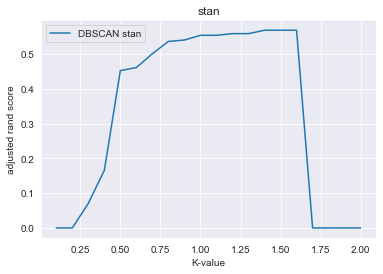

In [22]:
df2 = dbscan_clustering_eps(stan_df, labels, 7, title="stan", end=20)

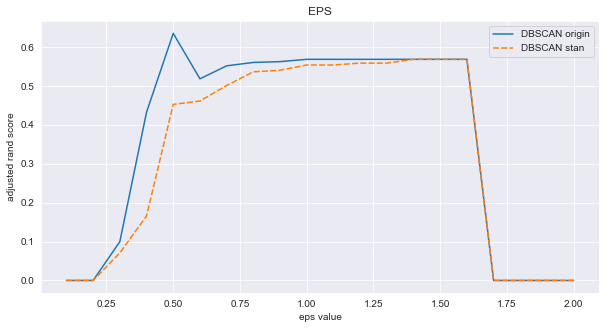

In [23]:
merge([df1, df2], "EPS", xlabel="eps value")

层次聚类BIRCH

In [24]:
def birch_clustering_threshold(data, labels, title="", start=1, end=10):
    scores = []
    mss = []
    for i in [t/10 for t in range(start, end+1)]:
        mss.append(i)
        pre = Birch(n_clusters=4, threshold=i).fit_predict(data)
        d = pd.DataFrame(pre, columns=['cls'])
        n_cls = len(d.cls.unique())
        score = adjusted_rand_score(labels, pre)
        print("ARS is {:.4f} , {} clusters, while eps = {}".format(score,n_cls, i))
        scores.append(score)    
    df = plotit(title, scores, mss, "BIRCH " + title, xlabel="threshold")
    return df

ARS is 0.6677 , 4 clusters, while eps = 0.1
ARS is 0.5895 , 4 clusters, while eps = 0.2
ARS is 0.6051 , 4 clusters, while eps = 0.3
ARS is 0.6699 , 4 clusters, while eps = 0.4
ARS is 0.5675 , 4 clusters, while eps = 0.5
ARS is 0.5915 , 4 clusters, while eps = 0.6
ARS is 0.5951 , 4 clusters, while eps = 0.7
ARS is 0.5951 , 4 clusters, while eps = 0.8
ARS is 0.5854 , 4 clusters, while eps = 0.9
ARS is 0.7455 , 3 clusters, while eps = 1.0
ARS is 0.7155 , 3 clusters, while eps = 1.1


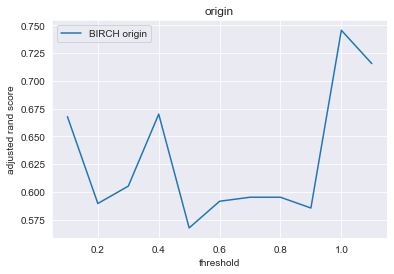

In [25]:
df1 = birch_clustering_threshold(orig_df, labels, "origin", end=11)

ARS is 0.6231 , 4 clusters, while eps = 0.1
ARS is 0.5523 , 4 clusters, while eps = 0.2
ARS is 0.5749 , 4 clusters, while eps = 0.3
ARS is 0.6045 , 4 clusters, while eps = 0.4
ARS is 0.6314 , 4 clusters, while eps = 0.5
ARS is 0.5450 , 4 clusters, while eps = 0.6
ARS is 0.5386 , 4 clusters, while eps = 0.7
ARS is 0.5869 , 4 clusters, while eps = 0.8
ARS is 0.5251 , 4 clusters, while eps = 0.9
ARS is 0.5602 , 4 clusters, while eps = 1.0
ARS is 0.5516 , 4 clusters, while eps = 1.1


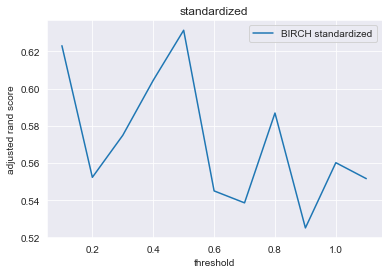

In [26]:
df2 = birch_clustering_threshold(stan_df, labels, "standardized", end=11)

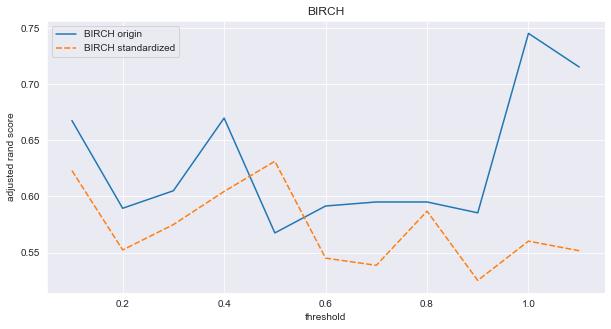

In [27]:
merge([df1, df2], "BIRCH", xlabel="threshold")

In [28]:
def birch_clustering_branching_factor(data, labels, title="", start=40, end=60):
    scores = []
    mss = []
    for i in range(start, end+1):
        mss.append(i)
        pre = Birch(n_clusters=3, threshold=1, branching_factor=i).fit_predict(data)
        d = pd.DataFrame(pre, columns=['cls'])
        n_cls = len(d.cls.unique())
        score = adjusted_rand_score(labels, pre)
        print("ARS is {:.4f} , {} clusters, while eps = {}".format(score,n_cls, i))
        scores.append(score)    
    df = plotit(title, scores, mss, "BIRCH " + title, xlabel="branch_factor")
    return df

ARS is 0.7455 , 3 clusters, while eps = 40
ARS is 0.7455 , 3 clusters, while eps = 41
ARS is 0.7455 , 3 clusters, while eps = 42
ARS is 0.7455 , 3 clusters, while eps = 43
ARS is 0.7455 , 3 clusters, while eps = 44
ARS is 0.7455 , 3 clusters, while eps = 45
ARS is 0.7455 , 3 clusters, while eps = 46
ARS is 0.7455 , 3 clusters, while eps = 47
ARS is 0.7455 , 3 clusters, while eps = 48
ARS is 0.7455 , 3 clusters, while eps = 49
ARS is 0.7455 , 3 clusters, while eps = 50
ARS is 0.7455 , 3 clusters, while eps = 51
ARS is 0.7455 , 3 clusters, while eps = 52
ARS is 0.7455 , 3 clusters, while eps = 53
ARS is 0.7455 , 3 clusters, while eps = 54
ARS is 0.7455 , 3 clusters, while eps = 55
ARS is 0.7455 , 3 clusters, while eps = 56
ARS is 0.7455 , 3 clusters, while eps = 57
ARS is 0.7455 , 3 clusters, while eps = 58
ARS is 0.7455 , 3 clusters, while eps = 59
ARS is 0.7455 , 3 clusters, while eps = 60


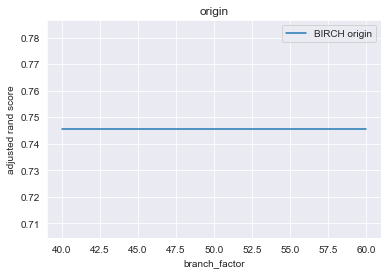

In [29]:
df1 = birch_clustering_branching_factor(orig_df, labels, "origin")

AP聚类

In [30]:
def ap_clustering(data, labels, title="", start=-60, end=-40):
    scores = []
    mss = []
    for i in range(start, end+1):
        mss.append(i)
        pre = AffinityPropagation(preference=i).fit_predict(data)
        d = pd.DataFrame(pre, columns=['cls'])
        n_cls = len(d.cls.unique())
        score = adjusted_rand_score(labels, pre)
        print("ARS is {:.4f} , {} clusters, while eps = {}".format(score,n_cls, i))
        scores.append(score)    
    df = plotit(title, scores, mss, "AP " + title, xlabel="preference")
    return df

ARS is 0.7455 , 3 clusters, while eps = -60
ARS is 0.7455 , 3 clusters, while eps = -59
ARS is 0.7455 , 3 clusters, while eps = -58
ARS is 0.7455 , 3 clusters, while eps = -57
ARS is 0.7455 , 3 clusters, while eps = -56
ARS is 0.7455 , 3 clusters, while eps = -55
ARS is 0.7430 , 3 clusters, while eps = -54
ARS is 0.7455 , 3 clusters, while eps = -53
ARS is 0.7455 , 3 clusters, while eps = -52
ARS is 0.7455 , 3 clusters, while eps = -51
ARS is 0.8022 , 3 clusters, while eps = -50
ARS is 0.7149 , 3 clusters, while eps = -49
ARS is 0.7455 , 3 clusters, while eps = -48
ARS is 0.7455 , 3 clusters, while eps = -47
ARS is 0.7455 , 3 clusters, while eps = -46
ARS is 0.7455 , 3 clusters, while eps = -45
ARS is 0.7455 , 3 clusters, while eps = -44
ARS is 0.7455 , 3 clusters, while eps = -43
ARS is 0.7455 , 3 clusters, while eps = -42
ARS is 0.7455 , 3 clusters, while eps = -41
ARS is 0.7455 , 3 clusters, while eps = -40


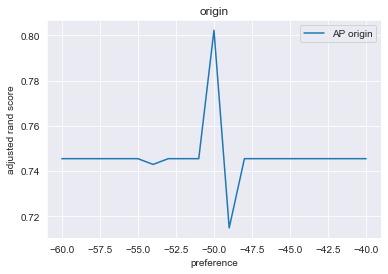

In [31]:
df1 = ap_clustering(orig_df, labels, "origin")

ARS is 0.6313 , 3 clusters, while eps = -80
ARS is 0.6313 , 3 clusters, while eps = -79
ARS is 0.5681 , 2 clusters, while eps = -78
ARS is 0.6765 , 3 clusters, while eps = -77
ARS is 0.6765 , 3 clusters, while eps = -76
ARS is 0.6412 , 3 clusters, while eps = -75
ARS is 0.6313 , 3 clusters, while eps = -74
ARS is 0.6219 , 3 clusters, while eps = -73
ARS is 0.6313 , 3 clusters, while eps = -72
ARS is 0.6313 , 3 clusters, while eps = -71
ARS is 0.5681 , 2 clusters, while eps = -70
ARS is 0.6412 , 3 clusters, while eps = -69
ARS is 0.6313 , 3 clusters, while eps = -68
ARS is 0.6765 , 3 clusters, while eps = -67
ARS is 0.6246 , 3 clusters, while eps = -66
ARS is 0.6313 , 3 clusters, while eps = -65
ARS is 0.6246 , 3 clusters, while eps = -64
ARS is 0.6765 , 3 clusters, while eps = -63
ARS is 0.6765 , 3 clusters, while eps = -62
ARS is 0.6412 , 3 clusters, while eps = -61
ARS is 0.6765 , 3 clusters, while eps = -60


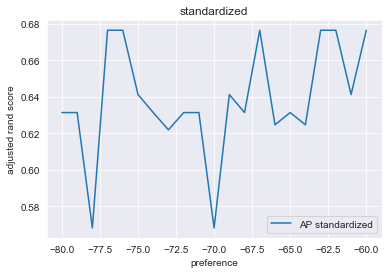

In [32]:
df2 = ap_clustering(stan_df, labels, "standardized", start=-80, end=-60)

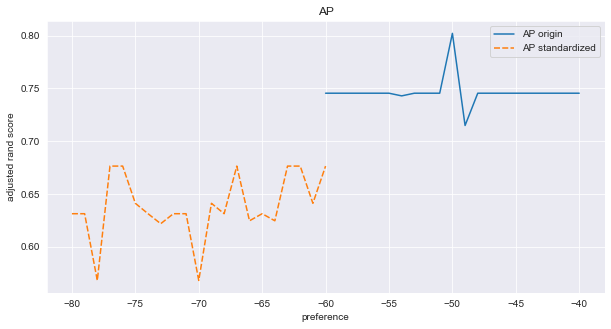

In [33]:
merge([df1, df2], "AP", xlabel="preference")